# Task-2: Movie Rating Prediction using Python

Importing all the necessary libraries required for analysis.

In [129]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [87]:
df_movie=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Codsoft/Movies.csv",encoding="Latin1")
df_movie.dropna(inplace=True)
df_movie.head()

,Movie ID,Movie Name,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [107]:
df_movie.shape

(3883, 3)

In [89]:
df_user=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Codsoft/User.csv",encoding="Latin1")
df_user.dropna(inplace=True)
df_user.columns=['UserID','Gender','Age','Occupation','ZipCode']
df_user.head()

,UserID,Gender,Age,Occupation,ZipCode
0,2.0,M,56.0,16.0,70072
1,3.0,M,25.0,15.0,55117
2,4.0,M,45.0,7.0,2460
3,5.0,M,25.0,20.0,55455
4,6.0,F,50.0,9.0,55117


In [106]:
df_user.shape

(6039, 5)

In [130]:
df_rating=pd.read_csv("C:/Users/Kankana Ghosh/Desktop/Codsoft/ratings.dat",sep="::")
df_rating.columns=['ID','Movie ID','Ratings','TimeStamp']
df_rating.head()

,ID,Movie ID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [91]:
df=pd.concat([df_movie,df_user,df_rating],axis=1)
df.head()

,Movie ID,Movie Name,Category,UserID,Gender,Age,Occupation,ZipCode,ID,Movie ID,Ratings,TimeStamp
0,1.0,Toy Story (1995),Animation|Children's|Comedy,2.0,M,56.0,16.0,70072,1,661,3,978302109
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,3.0,M,25.0,15.0,55117,1,914,3,978301968
2,3.0,Grumpier Old Men (1995),Comedy|Romance,4.0,M,45.0,7.0,2460,1,3408,4,978300275
3,4.0,Waiting to Exhale (1995),Comedy|Drama,5.0,M,25.0,20.0,55455,1,2355,5,978824291
4,5.0,Father of the Bride Part II (1995),Comedy,6.0,F,50.0,9.0,55117,1,1197,3,978302268


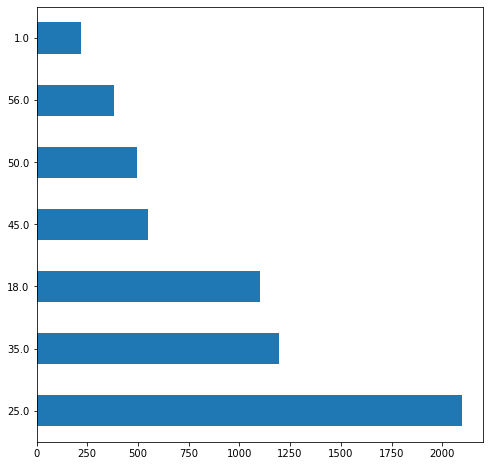

In [92]:
df['Age'].value_counts().plot(kind="barh",figsize=(8,8))
plt.show()

Text(0, 0.5, 'Count of users')

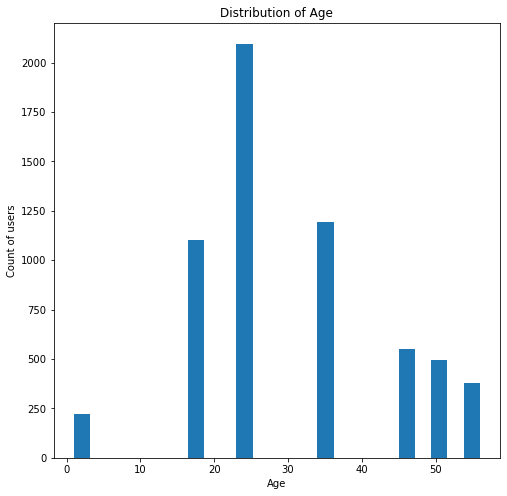

In [93]:
df.Age.plot.hist(bins=25,figsize=(8,8))
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Count of users')

In [97]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_Group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'Age_Group']].drop_duplicates()[:10]

,Age,Age_Group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


<AxesSubplot:>

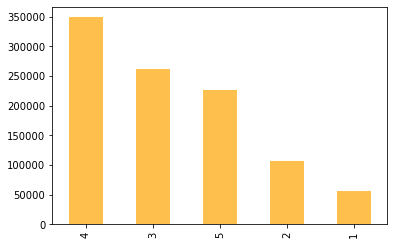

In [98]:
df['Ratings'].value_counts().plot(kind="bar",alpha=0.7,color="orange")

In [99]:
groupby_moviename=df.groupby('Movie Name')
groubby_rating=df.groupby('Ratings')
groupby_uid=df.groupby('UserID')

In [100]:
movies=df.groupby('Movie Name').size().sort_values(ascending=True)[:1000]
print(movies)

Movie Name
$1,000,000 Duck (1971)                      1
Only You (1994)                             1
Open Season (1996)                          1
Open Your Eyes (Abre los ojos) (1997)       1
Operation Condor (Feiying gaiwak) (1990)    1
                                           ..
Toy Story (1995)                            1
Toy Story 2 (1999)                          1
Toys (1992)                                 1
Total Recall (1990)                         1
Trading Places (1983)                       1
Length: 1000, dtype: int64


In [108]:
ToyStory_data = groupby_moviename.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

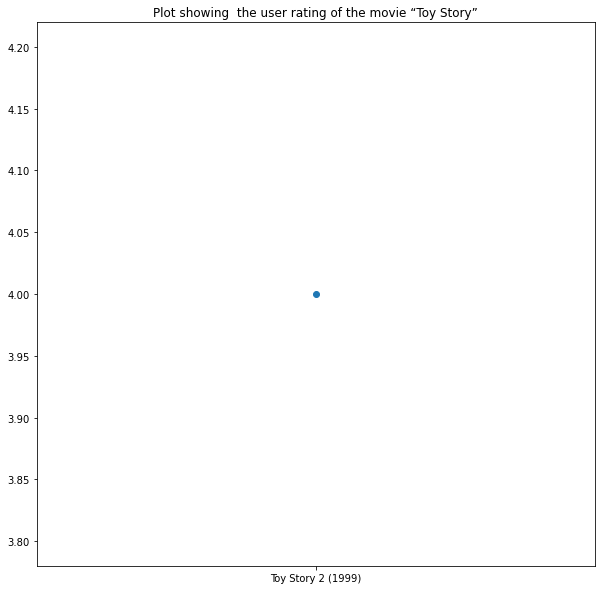

In [102]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['Movie Name'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

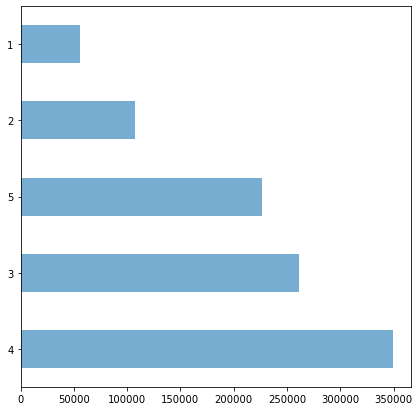

In [64]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [65]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


In [131]:
#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

In [126]:
#Use the following features:movie id,age,occupation
features = first_500[['Movie ID','Age','Occupation']].values

In [123]:
#Use rating as label
labels = first_500[['Ratings']].values

In [127]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

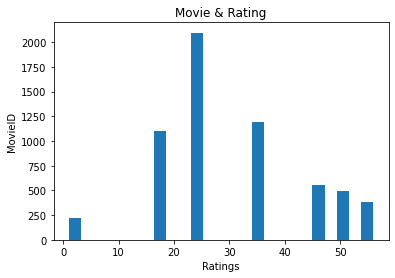

In [71]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

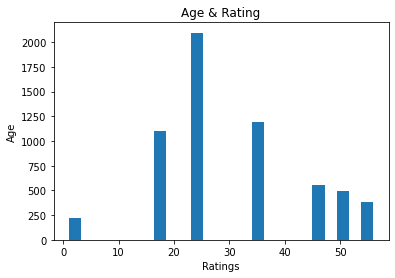

In [72]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

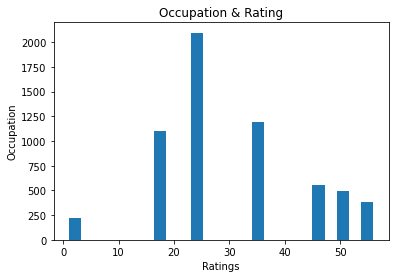

In [73]:
#Create a histogram for occupation
df.Age.plot.hist(bins=25)
plt.title("Occupation & Rating")
plt.ylabel('Occupation')
plt.xlabel('Ratings')

In [132]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

34.33

In [133]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

34.91

In [134]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

59.89

In [135]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

34.91

In [136]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

21.27

In [137]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

14.65

In [138]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

9.58

In [139]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [140]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

100.0

In [141]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,59.89
0,Support Vector Machines,34.91
4,Naive Bayes,34.91
2,Logistic Regression,34.33
5,Perceptron,21.27
7,Linear SVC,14.65
6,Stochastic Gradient Decent,9.58


The above table shows the different models used for this analysis along with their accuracy scores in descending order. Here, we get to see that Random Forest and Decision Tree models have full accuracy following the others.